# Exploration data analysis of visualization and training a model by given attributes

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

Existing dataset:

In [15]:
datae = p.read_csv("heart.csv")
dfe=datae.dropna()

In [16]:
p.crosstab(dfe.age,dfe.cp)

cp,0,1,2,3
age,,,,
29,0,1,0,0
34,0,1,0,1
35,3,1,0,0
37,0,0,2,0
38,0,0,2,1
39,1,0,3,0
40,2,0,0,1
41,1,6,3,0
42,3,1,3,1


Text(0.5, 1.0, 'age of distribution of patients')

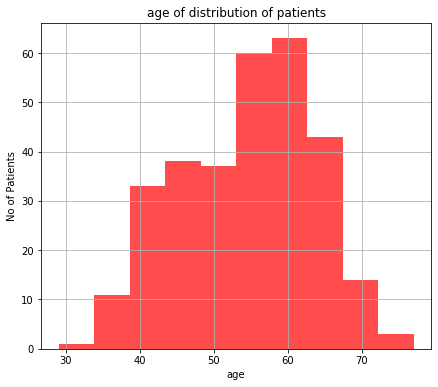

In [17]:
#Histogram Plot of Age distribution
dfe['age'].hist(figsize=(7,6), color='red', alpha=0.7)
plt.xlabel('age')
plt.ylabel('No of Patients')
plt.title('age of distribution of patients')

58    6.27
57    5.61
54    5.28
59    4.62
52    4.29
51    3.96
62    3.63
44    3.63
60    3.63
56    3.63
64    3.30
41    3.30
63    2.97
67    2.97
55    2.64
45    2.64
42    2.64
53    2.64
61    2.64
65    2.64
43    2.64
66    2.31
50    2.31
48    2.31
46    2.31
49    1.65
47    1.65
39    1.32
35    1.32
68    1.32
70    1.32
40    0.99
71    0.99
69    0.99
38    0.99
34    0.66
37    0.66
77    0.33
76    0.33
74    0.33
29    0.33
Name: age, dtype: float64

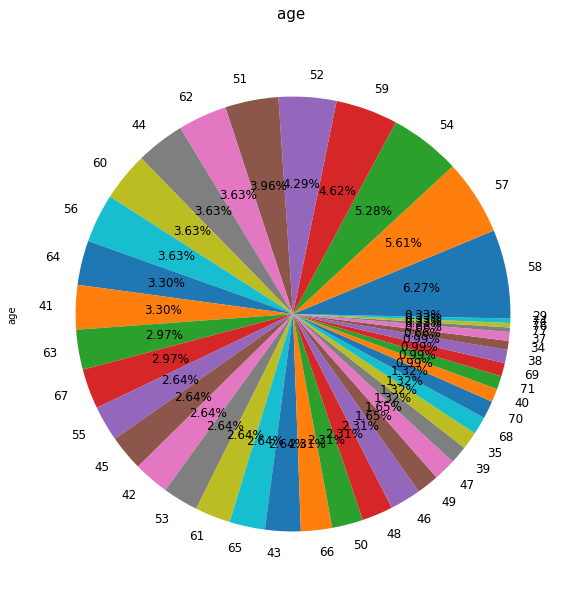

In [18]:
#Propagation by variable
def PropByVar(dfe, variable):
    dataframe_pie = dfe[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/dfe.shape[0]*100,2)
PropByVar(dfe, 'age')

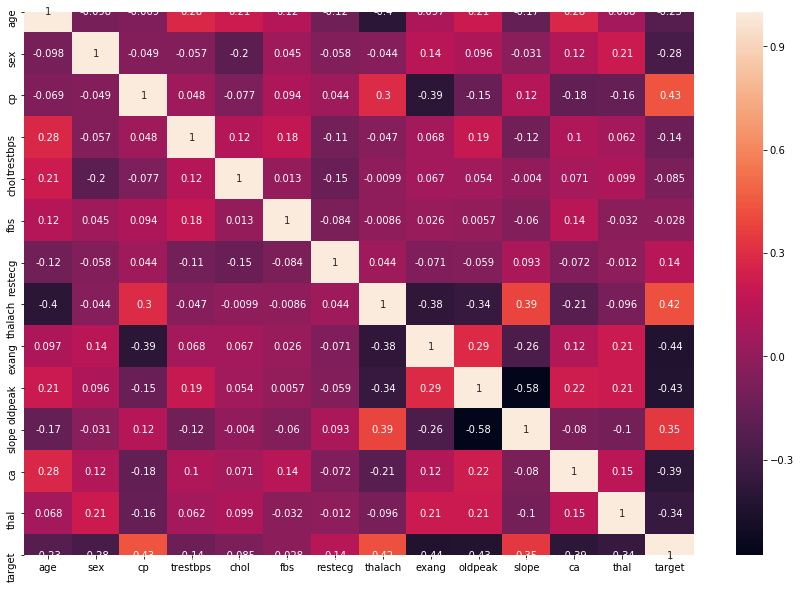

In [19]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,10))
s.heatmap(dfe.corr(), ax=ax, annot=True)

Spliting Dataset for Existing Process:

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
le = LabelEncoder()
for i in var_mod:
    dfe[i] = le.fit_transform(dfe[i]).astype(int)


In [21]:
#preprocessing, split test and dataset, split response variable
X = dfe.drop(labels='target', axis=1)
#Response variable
y = dfe.loc[:,'target']    

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  212
Number of test dataset:  91
Total number of dataset:  303


In [24]:
def qul_No_qul_bar_plote(dfe, bygroup):
    dataframe_by_Group = p.crosstab(dfe[bygroup], columns=dfe["target"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(15,7));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Disease having or not by given attributes from Existing Datas (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group



target,0,1
sex,,
0,25.00,75.00
1,55.07,44.93


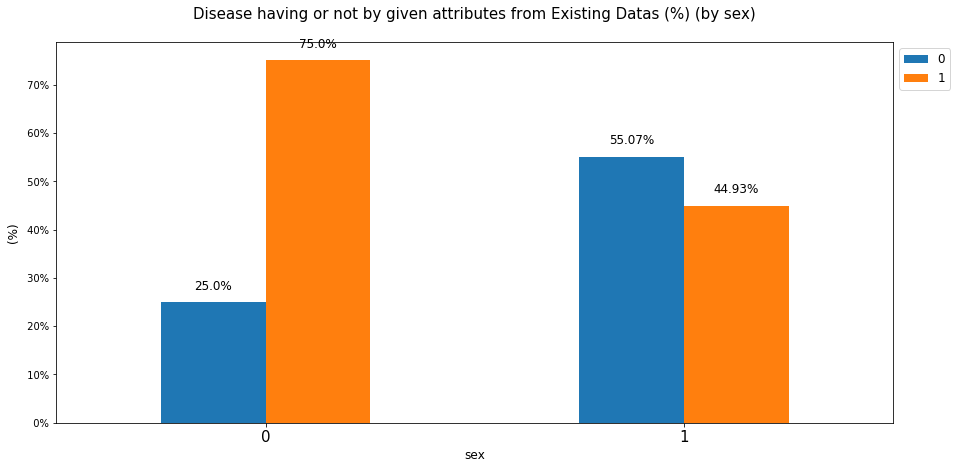

In [25]:
qul_No_qul_bar_plote(dfe, 'sex')